# Plot sinogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [2]:
def plot_sinogram_slice(im, slice):
    sinogram = np.moveaxis(im, 0, -1)
    dx, dy = 0.5 * 180.0 / max(im.shape), 0.5 / sinogram.shape[0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

    ax1.imshow(im[0], cmap=plt.cm.Greys_r)
    ax1.set_title('Projection image (front)')
    ax1.axhline(y = slice, color = 'r', linestyle = '-')

    ax2.set_title(f"Sinogram (slice {slice})")
    ax2.set_xlabel("Projection angle (deg)")
    ax2.set_ylabel("Projection position (pixels)")
    plt.imshow(sinogram[slice], cmap=plt.cm.Greys_r,
            extent=(-dx, 360.0 + dx, sinogram[slice].shape[0] + dy, -dy),
            aspect='auto', origin='upper')
    
    fig.tight_layout()
    plt.show()

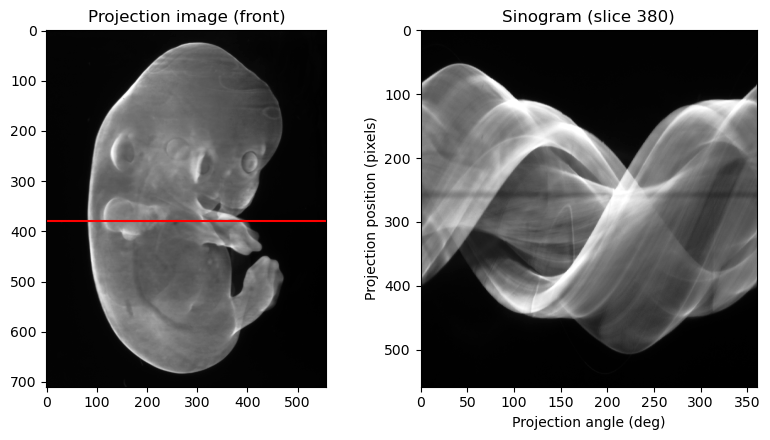

In [3]:
im = io.imread(r'D:\MSci_Project\1_Data\MSc_OPT_test_data_aligned.tif')
plot_sinogram_slice(im, 380)

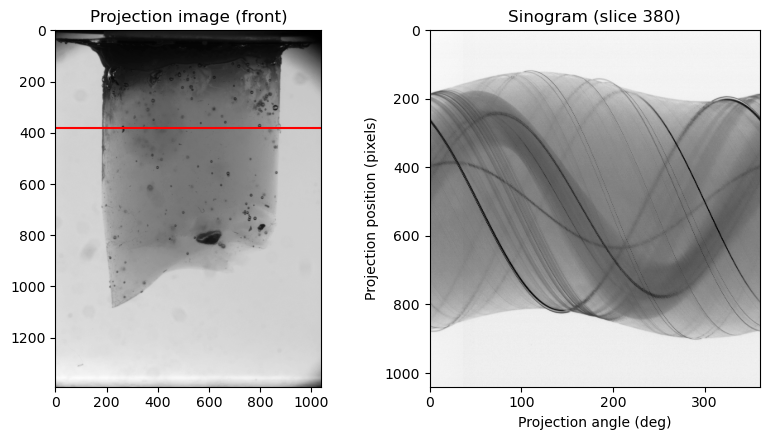

In [4]:
im = io.imread(r'D:\MSci_Project\1_Data\2022-12-01 broken phantom\1_2\1_2_MMStack_Pos0.ome.tif')
plot_sinogram_slice(im, 380)

In [8]:
im = io.imread(r'D:\MSci_Project\1_Data\MSc_OPT_test_data_aligned.tif')

In [10]:
# adapted from https://stackoverflow.com/a/19476891

import visvis as vv

imgdata = im[0]

nr, nc = imgdata.shape[:2]
x,y = np.mgrid[:nr, :nc]
z = np.ones((nr, nc))

for ii in range(5):
    vv.functions.surf(x, y, z*ii*100, imgdata, aa=3)

app = vv.use()
app.Run()